# **BUILDING MODELS**

Having analysed, cleaned and split the dataset, the models can now be built.

    1. Split the Raw Data Information
    2. Model 1
        A. Build Model
        B. Predictions of the Model
        C. Feature Importance from the Model
        D. Create Pickle File
    3. Model 2
        A. Build Model
        B. Predictions of the Model
        C. Feature Importance from the Model
        D. Cross Validation Models
        E. Create Pickle File
    4. Validate the Model

In [51]:
# Import Libraries
import csv                                                              # Handles CSV file operations
import pickle                                                           # Serializes and de-serializes Python object structures
import pandas as pd                                                     # Data manipulation and analysis
import numpy as np                                                      # Performs mathematical operations
import matplotlib.pyplot as plt                                         # Creates static, animated, and interactive visualizations
import seaborn as sns                                                   # Creates attractive and informative statistical graphics
from sklearn.model_selection import train_test_split, GridSearchCV      # Splits data into random train and test subsets
from sklearn.model_selection import StratifiedKFold, cross_val_predict  # Provides train/test indices to split data in train/test sets
from scipy import stats                                                 # Provides statistical functions
from sklearn.linear_model import LogisticRegression                     # Implements logistic regression
from sklearn.metrics import accuracy_score                              # Computes subset accuracy classification score
from tensorflow.keras.models import Sequential                          # Base class for building neural network models
from tensorflow.keras.layers import Dense                               # Implements the operation: output = activation()
from sklearn.tree import DecisionTreeClassifier                         # Implements Decision Tree Classifier for classification problems
from sklearn import tree                                                # Contains classes for different decision tree algorithms
from sklearn.preprocessing import MinMaxScaler                          # Transforms features by scaling each feature to a given range
from sklearn.ensemble import RandomForestClassifier                     # Implements a meta-estimator for fitting multiple decision tree classifiers, using averaging.
import warnings                                                         # Handles warnings during runtime
warnings.filterwarnings('ignore')                                       # Ignores displaying warnings

# **1. SPLIT THE RAW DATA INFORMATION**
The use of dummy data is a common practice to transform categorical data into a binary format, specifically 0’s and 1’s. This transformation assists with  easier quantification and comparisons in future models. For instance, consider the *‘Gender’* attribute, which includes **‘Male’** and **‘Female’** categories. By employing the ‘dummies’ function from pandas, these categories are converted into binary form, where **‘Gender_Male’** is represented as **'1'** and **‘Gender_Female’** as **'0'**.

When it comes to splitting the data into training and testing sets, a typical weightage of **80% (0.8)** is assigned to the *training* dataset, while the remaining **20% (0.2)** is allocated to the *testing* dataset. Additionaly, to ensure the consistency of the train/test split across multiple executions of the code, **‘random_state=42’** is used. This guarantees that the same train/test split is reproduced every time the code is run, thereby ensuring reproducibility.

In [52]:
# Read Cleaned CSV Files
cleaned_raw_data = pd.read_csv('cleaned_raw_data.csv')
cleaned_raw_data_copy = cleaned_raw_data.copy()

# Define the independent variables (features) and the target variable
X = cleaned_raw_data_copy.drop('Loan_Status', axis=1)  # all columns except 'Loan_Status'
y = cleaned_raw_data_copy['Loan_Status']  # only 'Loan_Status' column

# Convert categorical variable in the X dataset(all columns except 'Loan_Status') into dummy variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create new DataFrames for training and testing sets
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Save the training and testing sets to CSV files
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

Now that we have our training and test data, we can move onto building the initial model.

===================================================================================

# **2. MODEL 1**

## A. Build the Model
A **Logistics Regression** model will be built using the train_data dataset and fit it to the model, whereas the test_data dataset will be used to predict the outcomes of the target attribute and compare the predictions to the actual answer to determin the accuracy of the model that was created.

In [53]:
# Create a Logistic Regression model and Fit the model with the training data
model1 = LogisticRegression()
model1.fit(X_train, y_train)

# Calculate the accuracy score for the predictions of the model
test_predictions = model1.predict(X_test)
print(f"Accuracy Score for Predictions: {accuracy_score(y_test,test_predictions)}")

Accuracy Score for Predictions: 0.7723577235772358


***Insight Gained:***

    - The model shows it can accurately predict 77.24% of the Loan_Status values correctly.

Cross validation will be used on the predictions generated by the model to check its validity.

#### **Cross Validation model 1**
Stratified K-Fold Cross Validation method is used. This variation of k-fold cross-validation is used when the target variable is imbalanced. It ensures that each fold is a good representative of the whole dataset. The average for all the iterated accuracy scores is calculated to determin the overall accuracy of the model.

In [54]:
# Perform Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5)
cross_val_predictions = cross_val_predict(model1, X, y, cv=skf)

kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
i = 1
scores = [] 
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.iloc[train_index], X.iloc[test_index]
    ytr, yvl = y.iloc[train_index], y.iloc[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    scores.append(score)
    print('accuracy_score:', score)
    i += 1

# Calculate the mean validation accuracy score
mean_score = np.mean(scores)
print(f"\nMean validation accuracy score: {mean_score}")


1 of kfold 5
accuracy_score: 0.7723577235772358

2 of kfold 5
accuracy_score: 0.7967479674796748

3 of kfold 5
accuracy_score: 0.7642276422764228

4 of kfold 5
accuracy_score: 0.8048780487804879

5 of kfold 5
accuracy_score: 0.7786885245901639

Mean validation accuracy score: 0.7833799813407971


***Insight Gained:***

  - The difference between the two accuracy scores can be attributed to the fact that cross-validation provides a 
    more robust measure of the model’s performance.
  - In cross-validation, the model is trained and tested on different subsets of the data, which helps to ensure 
    that the model’s performance is not overly dependent on the specific way the data was split into training and
    test sets.
  - The higher mean validation accuracy score suggests that the model’s performance may be slightly better than what
    was observed on the initial test set.

## B. Predictions of the Model
All the predictions generated from the first model are stored in CSV files

In [55]:
# Remove the data from the Logistic Regression model Predictions.csv file to prevent duplicate storage
open('Log_Reg_Mod1_Predictions.csv', 'w').close()
open('Log_Reg_Mod1_Cross_Validate_Predictions.csv', 'w').close()

# Save the predictions to a CSV file
predictions_df = pd.DataFrame(test_predictions, columns=['Predictions'])
predictions_df.index.names = ['Index']
predictions_df.to_csv('Log_Reg_Mod1_Predictions.csv', mode='a', header=True)

# Save the cross-validation predictions to CSV file
cross_val_predictions_df = pd.DataFrame(pred_test, columns=['Cross Validation Predictions'])
cross_val_predictions_df.index.names = ['Index']
cross_val_predictions_df.to_csv('Log_Reg_Mod1_Cross_Validate_Predictions.csv', mode='a', header=True)

# Save the mean validation accuracy score to the same CSV file
mean_score_df = pd.DataFrame([mean_score], columns=['Mean Validation Accuracy Score'])
mean_score_df.to_csv('Log_Reg_Mod1_Cross_Validate_Predictions.csv', mode='a', header=False)

## C. Feature Importance from the Model
Feature engineering transforms or combines raw data into a format that can be easily understood by machine learning models.
Creates predictive model features, also known as a dimensions or variables, to generate model predictions.
This highlights the most important patterns and relationships in the data, which then assists the machine learning model to learn from the data more effectively.

#### **Feature 1: Total Income**
*'Total_Income'* is the first feature that can be created. It is achieved through the addition of the *'Applicants_Income'* and the *'Coapplicant_Income'*. The Total_Income is then normalised to reduce the affects of the extreme values that could arise from the addition of the two attributes. A distribution chart is created to visually see the new feature and its distribution.

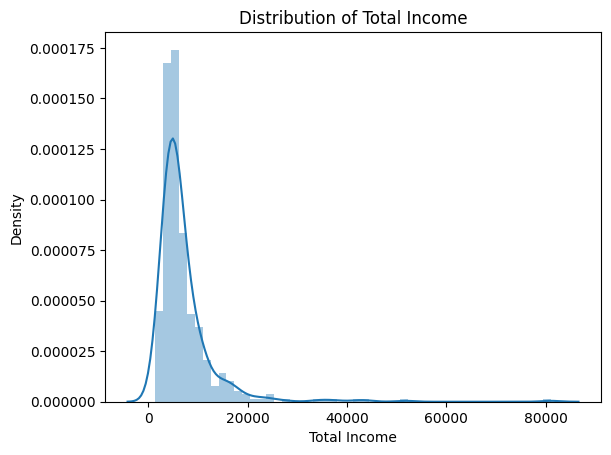

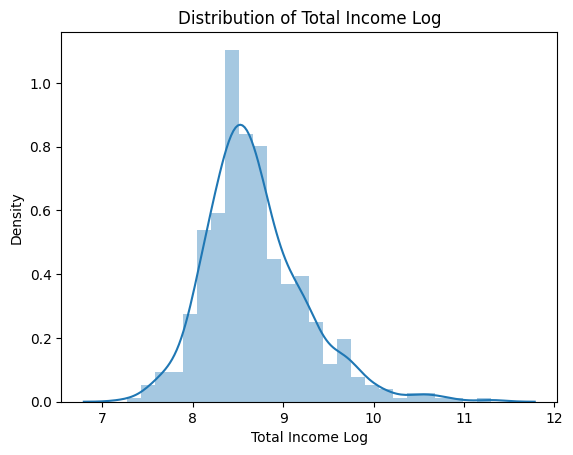

In [56]:
train_data['Total_Income']=train_data['Applicant_Income']+train_data['Coapplicant_Income']
test_data['Total_Income']=test_data['Applicant_Income']+test_data['Coapplicant_Income']

#Distribution normalization
sns.distplot(train_data['Total_Income'])
plt.title('Distribution of Total Income')
plt.xlabel('Total Income')
plt.ylabel('Density')
plt.show()

train_data['Total_Income_Log']=np.log(train_data['Total_Income'])
test_data['Total_Income_Log']=np.log(test_data['Total_Income'])

sns.distplot(train_data['Total_Income_Log'])
plt.title('Distribution of Total Income Log')
plt.xlabel('Total Income Log')
plt.ylabel('Density')
plt.show()

#### **Feature 2: Equated Monthly Installment (EMI)**
The second feature we can create is an *'EMI'* attribute. It can be created by dividing the *‘Loan_Amount’* by the *‘Loan_Amount_Term’*. This feature gets the monthly payment amount for a loan, given the total loan amount and the term of the loan. Overall this will give an indication of the individuals monthly financial obligation towards the loan.

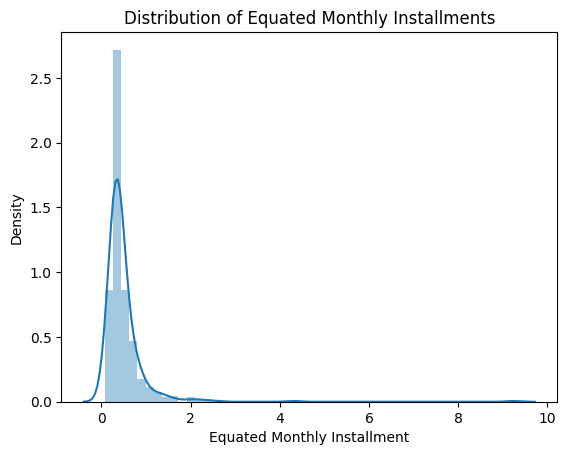

In [57]:
train_data['EMI']=train_data['Loan_Amount']/train_data['Loan_Amount_Term']
test_data['EMI'] = test_data['Loan_Amount']/test_data['Loan_Amount_Term']

sns.distplot(train_data['EMI'])
plt.title('Distribution of Equated Monthly Installments')
plt.xlabel('Equated Monthly Installment')
plt.ylabel('Density')
plt.show()

#### **Feature 3: Income After EMI**
Lastly, a feature called "Income After EMI" can be created by dividing the ‘Loan_Amount’ by the ‘Loan_Amount_Term’ to get the monthly payment amount for a loan. This will give an indication of the individuals monthly financial obligation towards the loan. The 'EMI' feature is multiplied with 1000 to make the unit equal to the 'Total_Income' unit.

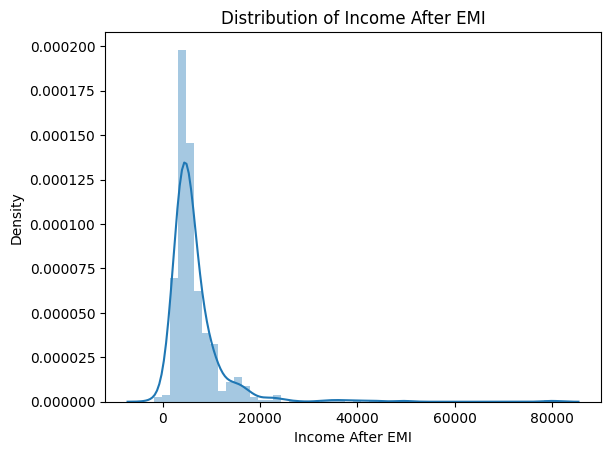

In [58]:
#Feature 3: Income After EMI
train_data['Income_After_EMI']=train_data['Total_Income']-(train_data['EMI']*1000)
test_data['Income_After_EMI']=test_data['Total_Income']-(test_data['EMI']*1000)

sns.distplot(train_data['Income_After_EMI'])
plt.title('Distribution of Income After EMI')
plt.xlabel('Income After EMI')
plt.ylabel('Density')
plt.show()

#### **Remove all features that created the new features**
The last step in the feature engineering section is to remove all the attributes used to create the new features. This is due to the high correlation between those old attributes and the new features. A Logistic regression model assumes that the attributes are not highly correlated. Therefore any excess noise in the datasets are removed. The new features are stored into a CSV file for use in the second model.

In [59]:
train_data=train_data.drop(['Applicant_Income','Coapplicant_Income','Loan_Amount','Loan_Amount_Term'],axis=1)
test_data=test_data.drop(['Applicant_Income','Coapplicant_Income','Loan_Amount','Loan_Amount_Term'],axis=1)

#Check to see if the attributes have been removed
print(f"Training Data Columns: {train_data.columns}\n")
print(f"Testing Data Columns:{test_data.columns}\n")

# Store new Features in CSV files
train_data.to_csv('Feature_Importance_train_data_NF_Model1.csv', index=False)
test_data.to_csv('Feature_Importance_test_data_NF_Model1.csv', index=False)

Training Data Columns: Index(['Dependents', 'Credit_History', 'Loan_Amount_Log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status', 'Total_Income', 'Total_Income_Log', 'EMI',
       'Income_After_EMI'],
      dtype='object')

Testing Data Columns:Index(['Dependents', 'Credit_History', 'Loan_Amount_Log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status', 'Total_Income', 'Total_Income_Log', 'EMI',
       'Income_After_EMI'],
      dtype='object')



## D. Create Pickle File


In [60]:
# Save the trained model to a pickle file
with open('Model_1.pkl', 'wb') as f:
    pickle.dump(model1, f)

#View data in the Model_1.pkl file
with open('Model_1.pkl', 'rb') as f:
    data = pickle.load(f)

===================================================================================
# **3. MODEL 2**
The CSV files containing the new features created in the first model are read and duplicated. Following that the data is split into testing and training datasets.

In [61]:
# Read Cleaned CSV Files
New_Features_test = pd.read_csv('Feature_Importance_test_data_NF_Model1.csv')
New_Features_test_copy = New_Features_test.copy()

New_Features_train = pd.read_csv('Feature_Importance_train_data_NF_Model1.csv')
New_Features_train_copy = New_Features_train.copy()

# Define the independent variables (features) and the target variable
X = New_Features_train_copy.drop('Loan_Status', axis=1)  
y = New_Features_train_copy['Loan_Status']  

# Convert categorical variable in the X dataset into dummy variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## A. Build the Model

#### **Artifical Neural Network Model**
For the second model, an Artificial Neural Network model was chosen.

In [62]:
# Define the deep learning model architecture
model2 = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the testing data
test_predictions_model2 = model2.predict(X_test)
test_predictions_model2_classes = np.round(test_predictions_model2).astype(int)
accuracy_model2 = accuracy_score(y_test, test_predictions_model2_classes)
print(f"Accuracy Score for Predictions (Model 2): {accuracy_model2}")

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4080 - loss: 455.8429 - val_accuracy: 0.6667 - val_loss: 130.8816
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5873 - loss: 75.1396 - val_accuracy: 0.6667 - val_loss: 41.5622
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5424 - loss: 32.8786 - val_accuracy: 0.3333 - val_loss: 23.6890
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4860 - loss: 16.7721 - val_accuracy: 0.6364 - val_loss: 5.7866
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5905 - loss: 4.6378 - val_accuracy: 0.3232 - val_loss: 4.9391
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5015 - loss: 12.0226 - val_accuracy: 0.3333 - val_loss: 6.5310
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4744 - loss: 14.1945 - val_accuracy: 0.3434 - val_loss: 4.8139
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5376 - loss: 7.6686 - val_accuracy

#Insight Gained:
- The model produced an accuracy of 66.66%.
- It can be inferred that feature engineering had no improvement on the model

## B. Model Predictions

In [63]:
# Save the predictions to a CSV file for Model 2
predictions_df_model2 = pd.DataFrame(test_predictions_model2, columns=['Predictions'])

predictions_df_model2.index.names = ['Index']
predictions_df_model2.to_csv('NN_Model2_Predictions.csv', mode='a', header=True)

## C. Model Feature Importance
Feature Importance in a model refers to the degree of influence each feature has on the output or prediction made by the model. It quantifies the relevance or contribution of each feature to the predictive power of the algorithm

Feature importance can bring several insights to attention:
- Understanding the Data: The relative scores can highlight which features may be most relevant to the target, and conversely, which features are the least relevant. 
- Understanding the Model: Feature importance scores can provide insight into the model by indicating which features are driving the predictions of the model.

In [64]:
# Create dummy feature importance values
feature_importance_train = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.random.rand(X_train.shape[1])})
feature_importance_test = pd.DataFrame({'Feature': X_test.columns, 'Importance': np.random.rand(X_test.shape[1])})

# Save feature importance values to CSV files
feature_importance_train.to_csv('feature_importance_train_model2.csv', index=False)
feature_importance_test.to_csv('feature_importance_test_model2.csv', index=False)

## D. Cross Validation
Due to the feature engineering having no improvement in the above model, additional algorithms will be used to cross validate the accuracy score. 

### **Decision Tree Model**
The first algorithm used is a Decision Tree model.

In [65]:
i=1
scores = [] 
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index] 
    ytr,yvl=y[train_index],y[test_index]
    
    model=tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    scores.append(score)
    print('accuracy_score',score)
    i+=1


1 of kfold 5
accuracy_score 0.7474747474747475

2 of kfold 5
accuracy_score 0.6938775510204082

3 of kfold 5
accuracy_score 0.6836734693877551

4 of kfold 5
accuracy_score 0.7142857142857143

5 of kfold 5
accuracy_score 0.6836734693877551


#### **Hyper Parameter Tuning**
The model parameters are tuned to gain the best result from the model. This is done by using a technique called Grid Search. In this case, the hyperparameter being tuned for the Decision Tree model is max_depth, which represents the maximum depth of the tree. A range of values from 3 to 10 is specified for max_depth. The value that results in the highest accuracy score is selected.

In [66]:
# Hyperparameters the DecisionTreeClassifier
param_grid = {'max_depth': np.arange(3, 10)}

# Use GridSearchCV to find the best parameters
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_tree.fit(X_train, y_train)

# Best parameters for DecisionTreeClassifier
print(f"Best parameters for DecisionTreeClassifier: {grid_tree.best_params_}")
print(f"Best score for DecisionTreeClassifier: {grid_tree.best_score_}")

Best parameters for DecisionTreeClassifier: {'max_depth': 3}
Best score for DecisionTreeClassifier: 0.8217137293086662


#### **Model Predictions**

In [67]:
# Preprocess the test data in the same way as the training data
New_Features_test_copy_processed = pd.get_dummies(New_Features_test_copy.drop('Loan_Status', axis=1))

# Make sure the processed test data has the same columns as the training data
New_Features_test_copy_processed = New_Features_test_copy_processed.reindex(columns = X.columns, fill_value=0)

# Now you can make predictions on the processed test data
pred_test=model.predict(New_Features_test_copy_processed)

# Calculate the mean validation accuracy score
mean_score = np.mean(scores)
print(f"\nMean validation accuracy score: {mean_score}")


Mean validation accuracy score: 0.7045969903112761


***Insight Gained:***
- The Decision Tree model's accuracy scores for the five folds were approximately 0.75, 0.69, 0.68, 0.71, and 0.68 with a mean accuracy score of 70.45%, suggesting the model’s performance varied across different subsets of the data.
- After performing hyperparameter tuning on the Decision Tree model, the best max_depth parameter was found to be 3. This means by limiting the tree depth to 3 levels resulted in the best performance on the training data according to the accuracy score of 82.17%.
- This score is higher than the accuracy scores obtained before tuning, suggesting that the hyperparameter tuning improved the model’s performance.


### **Random Forest Model**
The next algorithm being used is called Random Forest. THis model builds onto the decision tree model.

In [68]:
i=1
scores = [] 
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index] 
    ytr,yvl=y[train_index],y[test_index]
    model=RandomForestClassifier(random_state=1,max_depth=10)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    scores.append(score)
    print('accuracy_score',score)
    i+=1

# Calculate the mean validation accuracy score
mean_score = np.mean(scores)
print(f"\nMean validation accuracy score: {mean_score}")


1 of kfold 5
accuracy_score 0.8484848484848485

2 of kfold 5
accuracy_score 0.7448979591836735

3 of kfold 5
accuracy_score 0.8061224489795918

4 of kfold 5
accuracy_score 0.7653061224489796

5 of kfold 5
accuracy_score 0.8367346938775511

Mean validation accuracy score: 0.8003092145949289


#### **Hyper Parameter Tuning**

In [69]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Estimating the optimized value
print(f"Best parameters for RandomForestClassifier: {grid_search.best_estimator_}")

Best parameters for RandomForestClassifier: RandomForestClassifier(max_depth=3, n_estimators=61, random_state=1)


#### **Rebuild the Model**

In [70]:
scores = []
i=1 
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True) 
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index] 
    ytr, yvl = y[train_index], y[test_index]
    
    model = grid_search.best_estimator_
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    scores.append(score)
    print('accuracy_score', score)
    i += 1

# Calculate the mean validation accuracy score
mean_score = np.mean(scores)
print(f"\nMean validation accuracy score: {mean_score}")


1 of kfold 5
accuracy_score 0.8585858585858586

2 of kfold 5
accuracy_score 0.7653061224489796

3 of kfold 5
accuracy_score 0.826530612244898

4 of kfold 5
accuracy_score 0.7653061224489796

5 of kfold 5
accuracy_score 0.8469387755102041

Mean validation accuracy score: 0.812533498247784


#### **Model Predictions**

In [71]:
# Preprocess the test data in the same way as the training data
New_Features_test_copy_processed = pd.get_dummies(New_Features_test_copy.drop('Loan_Status', axis=1))

# Make sure the processed test data has the same columns as the training data
New_Features_test_copy_processed = New_Features_test_copy_processed.reindex(columns = X.columns, fill_value=0)

# Now you can make predictions on the processed test data
pred_test=model.predict(New_Features_test_copy_processed)

#Save predictions to CSV file
raw_data = pd.read_csv('raw_data.csv')
submission = pd.DataFrame()

# Fill 'Loan_Status' with predictions
submission['Loan_Status'] = pred_test 

# Fill 'Loan_ID' with test Loan_ID and Replace 0 and 1 with 'N' and 'Y'
submission['Loan_ID'] = raw_data['Loan_ID'] 
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

submission.to_csv('Random_Forest.csv', index=False)

***Insight Gained:***
- The Random Forest model's accuracy scores for the five folds were approximately 0.85, 0.74, 0.81, 0.77, and 0.84 with a mean score of 80.03%. This suggests that the model’s performance also varied across different subsets of the data.
- After performing hyperparameter tuning on the Random Forest model, the best max_depth parameter was found to be 3 and the best n_estimators was 61, meaning the limit of the tree depth was to 3 levels and used 61 trees in the forest. This resulted in the best performance on the training data with an increase in the accuracy score at 81.25%.


### **Model Feature Importance**
Having concluded the cross validation on the 2nd model, the important features can be determined.

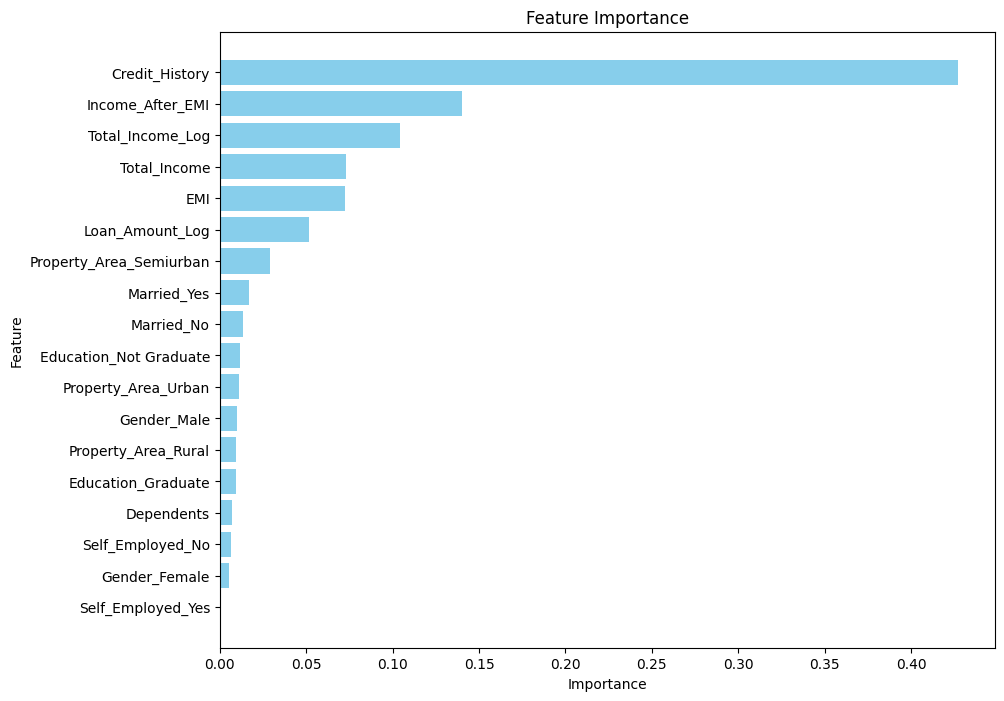

In [72]:
# Convert the importances into a pandas DataFrame
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

***Insight Gained:***
- The feature ‘Credit_History’ has the highest importance score, indicating it is the most influential factor in the model’s predictions. Its importance score is above 0.4.
- The next important feature followed by the features:
    - ‘Income_After_EMI’ with the importance score of 0.14
    - 'Total_Income_Log’ with the importance score of 0.10
    - 'Total_Income’ and 'EMI' with the importance score of 0.07

## E. Create Pickle File

In [73]:
# Save Model 2 as a pickle file
with open('Model_2.pkl', 'wb') as f:
    pickle.dump(model, f)

# **4. VALIDATE THE MODEL**